# Absolute vs. Relative Frequency in a Bar Chart

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
pokemon=pd.read_csv('pokemon.csv')
print("shape =",pokemon.shape)
pokemon.head(10)

shape = (807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


# Mixing type 1 and type 2 in one column

In [25]:
#pkmn_type=pokemon.melt(value_vars=['type_1','type_2'])
#pkmn_type=pokemon.melt(id_vars=['id','species'],value_vars=['type_1','type_2'])
#pkmn_type=pokemon.melt(id_vars=['id','species'],value_vars=['type_1','type_2'],var_name='type_level')
pkmn_type=pokemon.melt(id_vars=['id','species'],value_vars=['type_1','type_2'],var_name='type_level',value_name='type').dropna()
print(pkmn_type.shape)
pkmn_type[802:812]

(1212, 4)


,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


# sorting data in order by code

In [26]:
# by using pandas
counts=pkmn_type['type'].value_counts()
print("count for every type:\n",counts)
counts
print()
ord1=pkmn_type['type'].value_counts().index
print("orderd types:\n",ord1)



count for every type:
 water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

orderd types:
 Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')


# choosing color

In [27]:
clr=sb.color_palette()[2]
clr

(0.17254901960784313, 0.6274509803921569, 0.17254901960784313)

<AxesSubplot:xlabel='count', ylabel='type'>

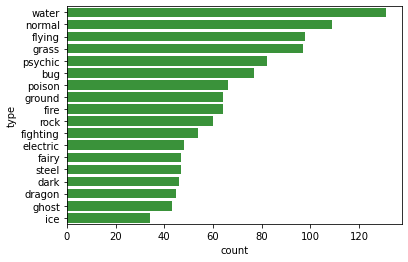

In [28]:
sb.countplot(data=pkmn_type,y='type',color=clr,order=ord1)

# Calculating ratio to get Relative Frequency

In [29]:
total_pokemon=pokemon.shape[0]
total_pokemon

807

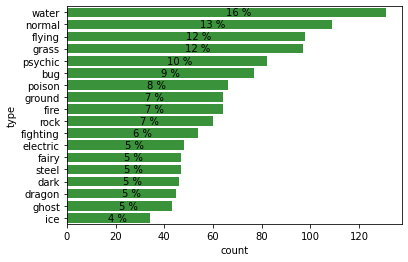

In [35]:
sb.countplot(data=pkmn_type,y='type',color=clr,order=ord1)
for i ,count in enumerate(counts):#i=0,count=131
    pct_string=str(int(100*(count/total_pokemon)))+" %"
    plt.text(count/2,i,pct_string,va='center')

In [21]:
counts=(pkmn_type['type'].value_counts()/807)*100
counts

water       16.232962
normal      13.506815
flying      12.143742
grass       12.019827
psychic     10.161090
bug          9.541512
poison       8.178439
ground       7.930607
fire         7.930607
rock         7.434944
fighting     6.691450
electric     5.947955
fairy        5.824040
steel        5.824040
dark         5.700124
dragon       5.576208
ghost        5.328377
ice          4.213135
Name: type, dtype: float64